# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# Crypto assets = BTC = '1.2' , ETH = '5.3'
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_df = requests.get(btc_url).json()

# Fetch current ETH price
eth_df = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = btc_df['data']['1']['quotes']['USD']['price'] * my_btc
my_eth_value = eth_df['data']['1027']['quotes']['USD']['price'] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $48168.00
The current value of your 5.3 ETH is $16077.82


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
secret_api_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    secret_api_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
start_date = pd.Timestamp("2021-05-27", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-02-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
cl_prc_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = cl_prc_data[cl_prc_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = cl_prc_data[cl_prc_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
cl_prc_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])
cl_prc_data.index = cl_prc_data.index.date
# Preview DataFrame
cl_prc_data

AGG                                                   \
              open      high      low   close    volume trade_count   
2021-05-27  114.61  114.6200  114.450  114.55   5074070       26897   
2021-05-28  114.55  114.6800  114.500  114.55   6768941       22067   
2021-06-01  114.36  114.4000  114.164  114.33   6209784       24174   
2021-06-02  114.45  114.5100  114.300  114.48   6103871       16636   
2021-06-03  114.31  114.4600  114.210  114.21   3464339       13186   
...            ...       ...      ...     ...       ...         ...   
2022-02-18  109.83  109.8800  109.710  109.87   6896731       20755   
2022-02-22  109.68  109.7800  109.565  109.75   6925944       21241   
2022-02-23  109.53  109.5500  109.230  109.26  10990620       24441   
2022-02-24  109.67  109.7681  109.170  109.46  12371968       36217   
2022-02-25  109.45  109.5800  109.330  109.57   9234147       27153   

                           SPY                                       \
                  vwap    open    high       low   close     volume   
2021-05-27  114.514082  420.16  420.72  418.9851  419.29   56709015   
2021-05-28  114.599865  421.03  421.25  419.7900  420.04   58529164   
2021-06-01  114.287139  422.60  422.72  419.2000  419.67   54216625   
2021-06-02  114.472412  420.35  421.23  419.2900  420.33   49595061   
2021-06-03  114.256881  417.82  419.99  416.2800  418.77   58145663   
...                ...     ...     ...       ...     ...        ...   
2022-02-18  109.811675  437.51  438.66  431.8200  434.31  127857744   
2022-02-22  109.684022  431.95  435.50  425.8600  429.57  120256973   
2022-02-23  109.388778  432.65  433.26  421.3500  422.07  126065955   
2022-02-24  109.528219  411.00  428.76  410.6400  428.30  213249029   
2022-02-25  109.450920  429.55  437.84  427.8600  437.75  116947965   

                                    
           trade_count        vwap  
2021-05-27      398526  419.764466  
2021-05-28      340041  420.381690  
2021-06-01      379476  420.229588  
2021-06-02      309854  420.182819  
2021-06-03      407471  418.763176  
...                ...         ...  
2022-02-18     1101247  435.262307  
2022-02-22     1169538  430.723141  
2022-02-23     1119436  425.990714  
2022-02-24     2310796  419.738184  
2022-02-25     1084239  434.342632  

[190 rows x 14 columns]

In [25]:
# Pick AGG and SPY close prices
agg_close_price = cl_prc_data['AGG']["close"][0]
spy_close_price = cl_prc_data["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.55
Current SPY closing price: $419.29


In [26]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20964.50
The current value of your 200 AGG shares is $22910.00


### Savings Health Analysis

In [28]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares_total = my_agg_value + my_spy_value
crypto_total = my_btc_value + my_eth_value
data = {'amount':[crypto_total, shares_total]}
index = ['crypto', 'shares']

# Create savings DataFrame
df_savings = pd.DataFrame(data, index=index)

# Display savings DataFrame
print(df_savings)

           amount
crypto  64245.815
shares  43874.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

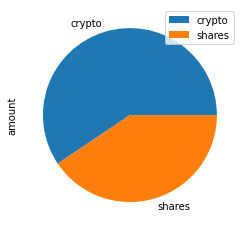

In [30]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [31]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings.sum()[0]

# Validate saving health
if savings > emergency_fund:
    print('Congratulations! You saved more than you need for emergencies! Time to vacation, Baller!')
elif savings == emergency_fund:
    print('Congratulations! You saved enough for your rainy day fund! Now breathe easy')
elif savings < emergency_fund:
    print(f'You are ${emergency_fund-savings} away from reaching your financial goal. Get to work!')

Congratulations! You saved more than you need for emergencies! Time to vacation, Baller!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [34]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
df_stock_data = alpaca.get_bars(
    tickers,
    tradeapi.TimeFrame.Day,
    start=start_date,
    end=end_date,
    limit = 10000
    ).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                                            \
              open    high      low   close   volume trade_count        vwap   
2021-05-27  114.61  114.62  114.450  114.55  5074070       26897  114.514082   
2021-05-28  114.55  114.68  114.500  114.55  6768941       22067  114.599865   
2021-06-01  114.36  114.40  114.164  114.33  6209784       24174  114.287139   
2021-06-02  114.45  114.51  114.300  114.48  6103871       16636  114.472412   
2021-06-03  114.31  114.46  114.210  114.21  3464339       13186  114.256881   

               SPY                                                              
              open    high       low   close    volume trade_count        vwap  
2021-05-27  420.16  420.72  418.9851  419.29  56709015      398526  419.764466  
2021-05-28  421.03  421.25  419.7900  420.04  58529164      340041  420.381690  
2021-06-01  422.60  422.72  419.2000  419.67  54216625      379476  420.229588  
2021-06-02  420.35  421.23  419.2900  420.33  49595061      309854  420.182819  
2021-06-03  417.82  419.99  416.2800  418.77  58145663      407471  418.763176

In [35]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
simulation_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [36]:
# Printing the simulation input data
simulation_returns.portfolio_data.head()

AGG                                                            \
              open    high      low   close   volume trade_count        vwap   
2021-05-27  114.61  114.62  114.450  114.55  5074070       26897  114.514082   
2021-05-28  114.55  114.68  114.500  114.55  6768941       22067  114.599865   
2021-06-01  114.36  114.40  114.164  114.33  6209784       24174  114.287139   
2021-06-02  114.45  114.51  114.300  114.48  6103871       16636  114.472412   
2021-06-03  114.31  114.46  114.210  114.21  3464339       13186  114.256881   

                            SPY                                      \
           daily_return    open    high       low   close    volume   
2021-05-27          NaN  420.16  420.72  418.9851  419.29  56709015   
2021-05-28     0.000000  421.03  421.25  419.7900  420.04  58529164   
2021-06-01    -0.001921  422.60  422.72  419.2000  419.67  54216625   
2021-06-02     0.001312  420.35  421.23  419.2900  420.33  49595061   
2021-06-03    -0.002358  417.82  419.99  416.2800  418.77  58145663   

                                                 
           trade_count        vwap daily_return  
2021-05-27      398526  419.764466          NaN  
2021-05-28      340041  420.381690     0.001789  
2021-06-01      379476  420.229588    -0.000881  
2021-06-02      309854  420.182819     0.001573  
2021-06-03      407471  418.763176    -0.003711

In [38]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
simulation_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995456,0.996476,0.999952,1.003139,0.993321,1.000199,1.003359,1.001532,1.004387,1.002981,...,1.007422,1.000209,1.000850,1.004222,0.995448,1.008062,0.994235,1.001028,1.000502,0.996584
2,0.993881,1.001709,1.002917,0.999714,0.993974,1.005867,1.006002,1.002001,1.009807,0.996431,...,1.006167,0.999008,0.998336,0.997988,0.996905,1.014663,0.995220,1.009813,0.999607,1.006054
3,0.992260,1.002034,0.988057,0.995985,0.994827,1.008133,1.019551,0.999715,1.008663,0.997074,...,1.013076,1.013778,0.999908,0.992909,0.995142,1.013772,0.998412,1.008133,0.996781,1.001353
4,0.991475,0.997910,0.989916,0.994377,0.993757,1.003490,1.018048,1.005386,1.012568,0.988950,...,1.019828,1.015281,0.992292,0.994346,0.989318,1.010322,0.982690,1.003498,0.997427,0.997602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.703326,2.388627,1.309778,2.014927,1.016013,6.078223,0.303314,1.811775,0.760569,1.417752,...,1.126735,1.515379,0.389947,0.643705,2.523435,0.866478,1.922850,1.668272,0.991694,0.997479
7557,1.684190,2.412400,1.310421,2.012735,1.026878,6.105733,0.305766,1.806244,0.763818,1.411795,...,1.125731,1.507963,0.390505,0.643212,2.519301,0.865418,1.930580,1.667944,0.998268,0.994702
7558,1.677097,2.414549,1.320180,2.008922,1.028420,6.111334,0.303829,1.794625,0.755941,1.402995,...,1.122979,1.495463,0.390886,0.642738,2.528679,0.867485,1.923502,1.655188,0.990849,0.986409
7559,1.669542,2.388739,1.336385,2.018786,1.018060,6.079108,0.303482,1.810283,0.753928,1.397764,...,1.119660,1.505605,0.392887,0.643189,2.531843,0.870854,1.909585,1.659941,0.990851,0.982656


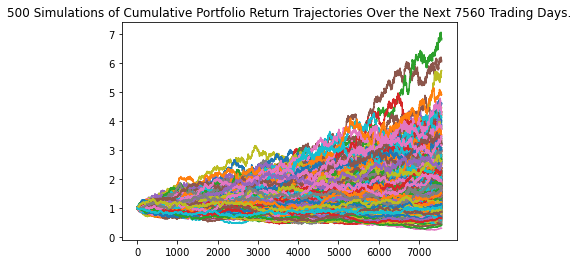

In [39]:
# Plot simulation outcomes
sim_plot = simulation_returns.plot_simulation()

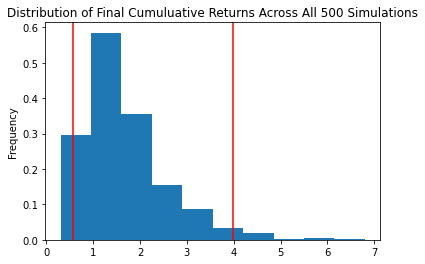

In [40]:
# Plot probability distribution and confidence intervals
dist_plot = simulation_returns.plot_distribution()

### Retirement Analysis

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_sim_sum = simulation_returns.summarize_cumulative_return()

# Print summary statistics
mc_sim_sum

count           500.000000
mean              1.682795
std               0.893673
min               0.301059
25%               1.075453
50%               1.484655
75%               2.034637
max               6.798456
95% CI Lower      0.575946
95% CI Upper      3.987920
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [42]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_sim_sum[8] * initial_investment,2)
ci_upper = round(mc_sim_sum[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $11518.91 and $79758.39


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [43]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_sim_sum[8] * initial_investment,2)
ci_upper = round(mc_sim_sum[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $17278.37 and $119637.59


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# No thank you. I am done :)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


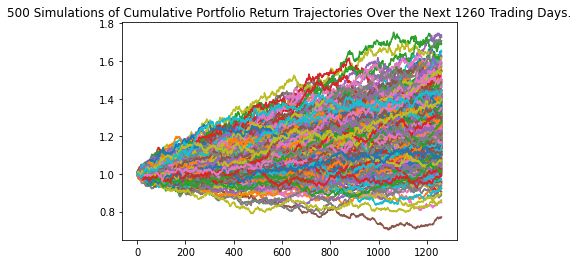

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

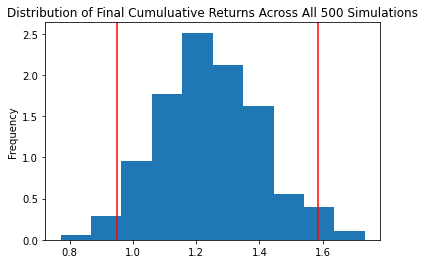

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


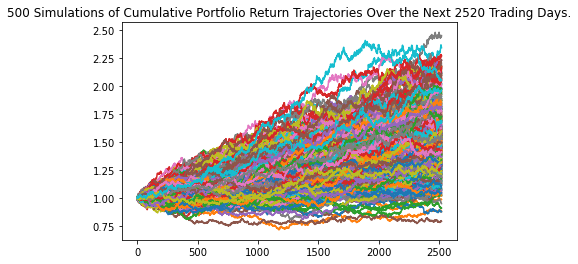

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

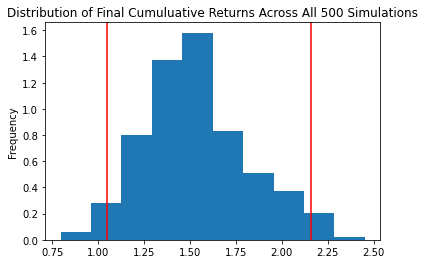

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
